In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

In [3]:
service = QiskitRuntimeService()

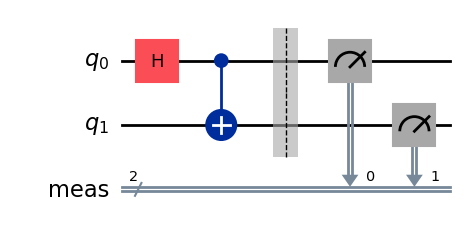

In [4]:
# Create Bell circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

In [5]:
# Find least busy backend to run on

service.least_busy(operational=True)

<IBMBackend('ibm_osaka')>

In [6]:
backend = service.get_backend("ibm_osaka")

In [7]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

In [8]:
sampler = Sampler(backend=backend)
job = sampler.run([isa_circuit], shots = 1024)

In [17]:
job.status()

'DONE'

In [19]:
# Get results from job

result = job.result()
counts = result[0].data.meas.get_counts()

In [28]:
# Get results from simulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc_sim = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result_sim = sampler.run([isa_qc_sim]).result()
counts_sim = result_sim[0].data.meas.get_counts()

c:\Users\elean\Documents\Imperial College London\Mathematics Undergraduate\Year 4\M4R\Lie Algebras Code\lie_venv\lib\site-packages\qiskit_ibm_runtime\session.py:157: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(


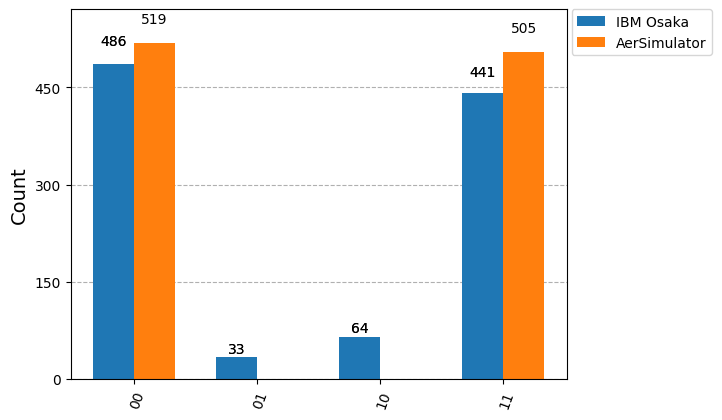

In [29]:
# Plot results

plot_histogram([counts, counts_sim], legend=['IBM Osaka', 'AerSimulator'])